# Wireless EEG 
Data, code and figures associated to: Wireless EEG: An Overview of Systems and Studies.

## Synchronize Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd "/content/gdrive/MyDrive/Colab Notebooks/weeg_nb/code_NI_2022"

/content/gdrive/MyDrive/Colab Notebooks/weeg_nb/code_NI_2022


## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.patches import Rectangle 

In [ ]:
plt.style.use('seaborn')
palette = sns.color_palette()
#plt.rcParams.update({'font.size': 16})

## Load data - Step1

In [ ]:
# Open Googlesheet csv file
df0_s1 = pd.read_csv('PubMed_weeg_NI_2022 - Step1.csv')
df_s1 = df0_s1.copy()

In [ ]:
df_s1.head()

,PMID,Title,Authors,Citation,First Author,Journal/Book,Conference,Acta,Publication Year,Create Date,PMCID,NIHMS ID,DOI
0,13116746,[Indication for ambulatory EEG examinations],MULLER N.,Dtsch Med Wochenschr. 1953 Nov 27;78(48):1664-...,MULLER N,Dtsch Med Wochenschr,0,0,1953,1953/11/27,NaN,NaN,10.1055/s-0028-1115032
1,13224315,[Differential amplifier for electroencephalogr...,"HOLZER W, LECHNER H.",Pflugers Arch Gesamte Physiol Menschen Tiere. ...,HOLZER W,Pflugers Arch Gesamte Physiol Menschen Tiere,0,0,1954,1954/10/04,NaN,NaN,10.1007/BF00412912
2,13222041,The statewide mobile service of Michigan Epile...,"BOHN ZS, KIDDER TE.",J Mich State Med Soc. 1954 Mar;53(3):270-1; pa...,BOHN ZS,J Mich State Med Soc,0,0,1954,1954/03/01,NaN,NaN,NaN
3,13420527,[A mobile electrode holder for EEG leads for u...,"SFERLAZZO R, FABIANI F.",Rass Studi Psichiatr. 1956;45(5):1034-5.,SFERLAZZO R,Rass Studi Psichiatr,0,0,1956,1956/01/01,NaN,NaN,NaN
4,13563171,Mobile EEG diagnostic unit of the Michigan Epi...,"ROLFE AL, DERBYSHIRE AJ, BOHN ZT.",J Am Med Assoc. 1958 Aug 2;167(14):1723-9. doi...,ROLFE AL,J Am Med Assoc,0,0,1958,1958/08/02,NaN,NaN,10.1001/jama.1958.02990310029006


## Years

In [188]:
y1= 1975
y2= 2022
pub_year = df_s1['Publication Year'][df_s1['Publication Year']<=y2]
pub_year = pub_year[df_s1['Publication Year']>=y1]

In [ ]:
years2= pub_year.dropna().value_counts().sort_index()
years2.to_csv('years.csv')

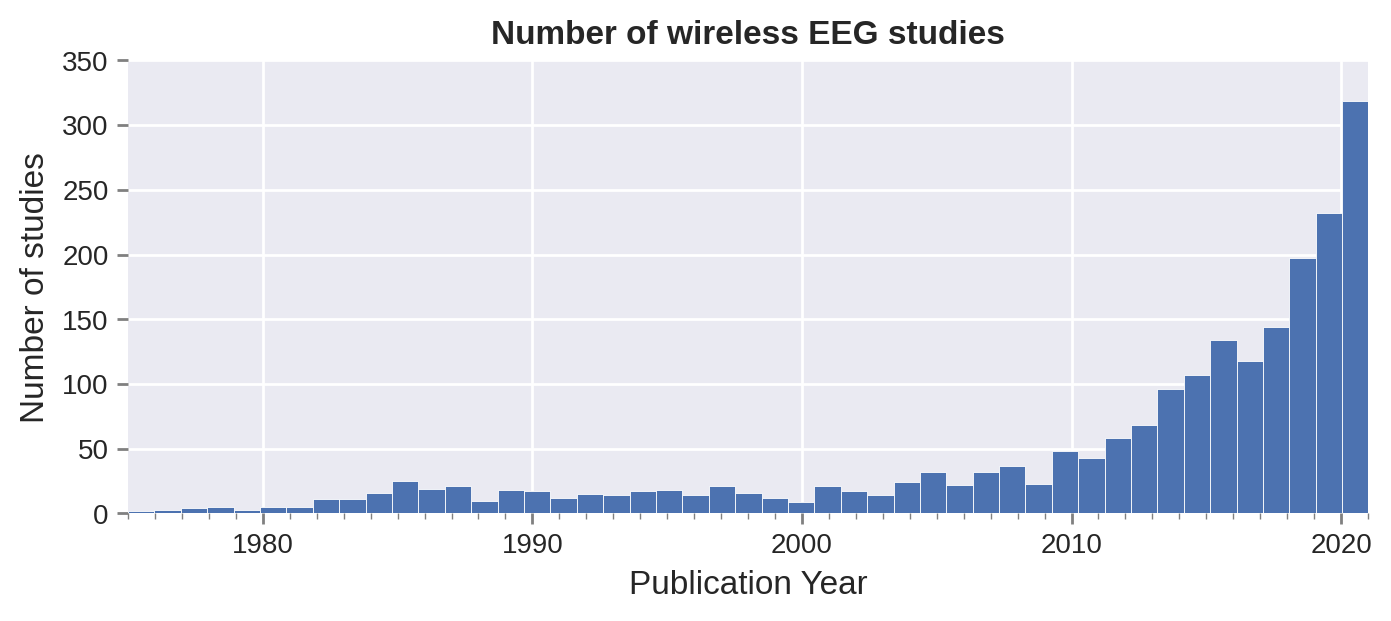

In [193]:
plt.figure(figsize=(8,3), dpi=200)

#ax = sns.histplot(data=pub_year,facecolor=palette[0], edgecolor='w', bins=y2-y1+1)
ax = sns.histplot(x=years2.index, weights=years2.values,facecolor=palette[0], edgecolor='w', bins=y2-y1+1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Number of wireless EEG studies', fontweight='bold',fontsize=12)
ax.set_xlabel('Publication Year',fontsize=12)
ax.set_ylabel('Number of studies',fontsize=12)

ax.set_xlim(y1,y2-1);
ax.set_ylim(0,350);

# Axis ticks
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='minor', length=2, color='grey', direction='out')
ax.tick_params(which='major', length=4, color='grey')

ax.tick_params(axis='both', which='major', pad=3)

plt.show()

## Load data - Table2

In [217]:
# Open Googlesheet csv file
df0_s2 = pd.read_csv('PubMed_weeg_NI_2022 - Table2.csv')
df_s2 = df0_s2.copy()

In [218]:
df_s2.head()

,Year,First Author,Area,Subarea,Channels,Device,Participants,DOI
0,2006,Chez MG,Clinical Conditions,Autism,16,DigiTrace,889,10.1016/j.yebeh.2005.11.001
1,2020,Lam AD,Clinical Conditions,Dementia,-,aEEG,99,10.1212/WNL.0000000000010612
2,2018,Simons S,Clinical Conditions,Dementia,16,Oxford Instr. Profile Study Room 2.3.411,22,10.3390/e20010021
3,2019,Ding X,Clinical Conditions,"Depression, Cognitive Tasks",5,Muse,348,10.1016/j.jad.2019.03.058
4,2021,Saeedi A,Clinical Conditions,Drepression,19,-,64,10.1007/s11571-020-09619-0


## Nchannels

In [219]:
nchan0=pd.Series(df_s2.Channels.str.split(', |,').dropna().sum()).value_counts()
not_int = [item for item in nchan0.index if not item.isdigit()]
nchan=nchan0.drop(not_int)
nchan.index=nchan.index.astype(int)
nchan.sort_index().to_csv('nchan.csv')

In [ ]:
ch2 = 140
exclude=nchan.index[nchan.index>=ch2]
print(exclude)
nchan1=nchan.drop(exclude)
nchan1.sort_index()

In [223]:
dch = pd.DataFrame(np.zeros((1, ch2+1)))+nchan1
nchannels=dch.T.fillna(0)

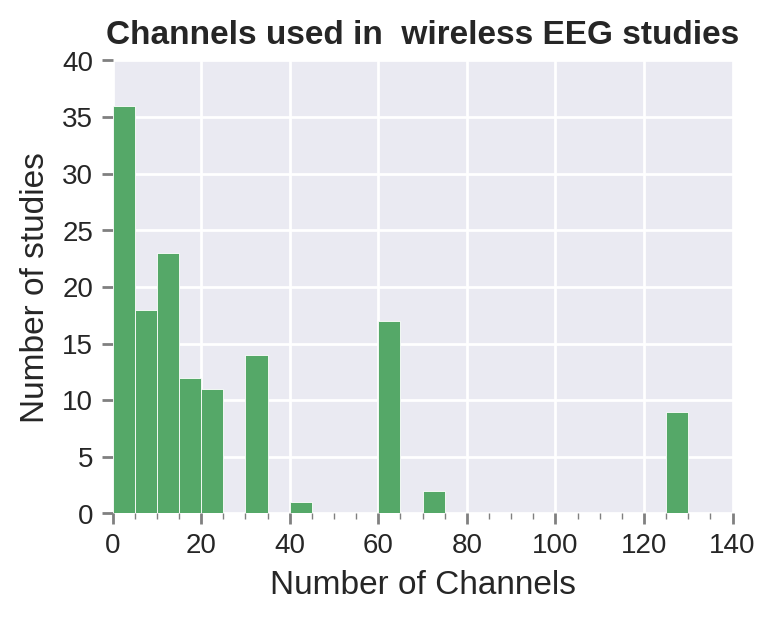

In [224]:
plt.figure(figsize=(4,3), dpi=200)

#ax = sns.histplot(x=nchan1.index, weights=nchan1.values, facecolor=palette[1], edgecolor='w', bins=28)
ax = sns.histplot(x=nchannels[0].index, weights=nchannels[0].values, facecolor=palette[1], edgecolor='w', bins=28)

ax.set_title('Channels used in  wireless EEG studies', fontweight='bold',fontsize=12)
ax.set_xlabel('Number of Channels',fontsize=12)
ax.set_ylabel('Number of studies',fontsize=12)

ax.set_xlim(0,ch2);
ax.set_ylim(0,40);

# Axis ticks
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(which='minor', length=2, color='grey', direction='out')
ax.tick_params(which='major', length=4, color='grey')

ax.tick_params(axis='both', which='major', pad=3)

plt.show()

##Nparticipants

In [225]:
npart0=df_s2['Participants'].dropna().value_counts().sort_index()
not_int = [item for item in npart0.index if not item.isdigit()]
npart=npart0.drop(not_int)
npart.index=npart.index.astype(int)
npart.sort_index().to_csv('npart.csv')

In [ ]:
p2 = 120
exclude=npart.index[npart.index>=p2]
print(exclude)
npart1=npart.drop(exclude)

In [ ]:
dp = pd.DataFrame(np.zeros((1, p2+1)))+npart1
participants=dp.T.fillna(0)
participants

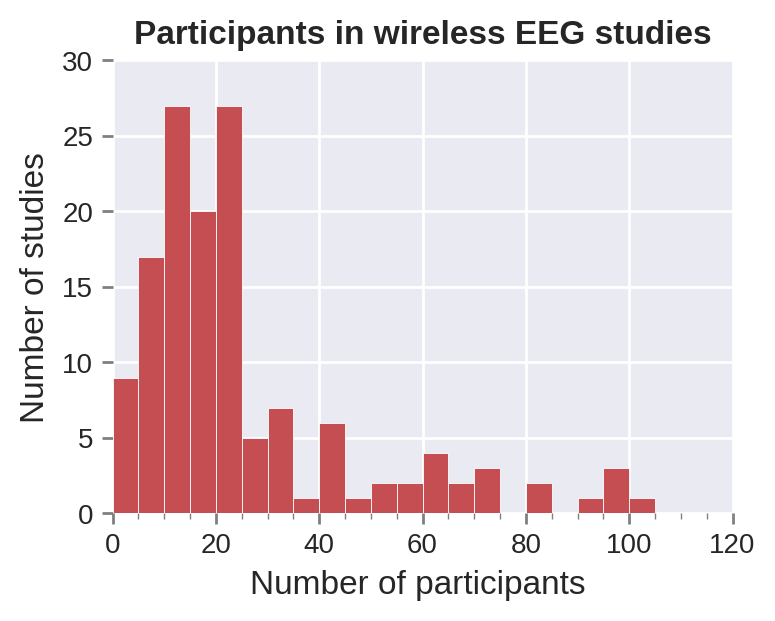

In [230]:
plt.figure(figsize=(4,3), dpi=200)

#ax = sns.histplot(x=npart1.index, weights=npart1.values,facecolor=palette[2], edgecolor='w', bins=25)
ax = sns.histplot(x=participants[0].index, weights=participants[0].values, facecolor=palette[2], edgecolor='w', bins=24)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Participants in wireless EEG studies', fontweight='bold',fontsize=12)
ax.set_xlabel('Number of participants ',fontsize=12)
ax.set_ylabel('Number of studies',fontsize=12)

ax.set_xlim(0,p2);
ax.set_ylim(0,30);

# Axis ticks
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(which='minor', length=2, color='grey', direction='out')
ax.tick_params(which='major', length=4, color='grey')

ax.tick_params(axis='both', which='major', pad=3)

plt.show()

## Devices

In [ ]:
dev=pd.Series(df_s2.Device.str.split(', ').dropna().sum()).value_counts()
dev.to_csv('devices.csv')

##Study

In [234]:
area= pd.Series(df_s2.Area.str.split(', ').dropna().sum()).value_counts()
area.to_csv('area.csv')

Cognitive Monitoring         67
Clinical Conditions          54
Methodological Approaches    32
Control and Communication    16
dtype: int64

In [ ]:
subarea= pd.Series(df_s2.Subarea.str.split(', ').dropna().sum()).value_counts()
subarea.to_csv('subarea.csv')